<a href="https://colab.research.google.com/github/YongjaeKwon0629/07_03_Numpy/blob/main/AUTOMOBILE_VISUALIZTION_EX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# ✅ 한글 폰트 경로 직접 지정 (꼭 실제 경로로 수정!)
font_path = "C:/Windows/Fonts/NanumGothic.ttf"  # 예: Windows 기준
font_prop = fm.FontProperties(fname=font_path)
mpl.rc('font', family=font_prop.get_name())
mpl.rcParams['axes.unicode_minus'] = False

# ========== 센서 초기화 및 스캔 함수 ==========
def init_sensors():
    sensors = {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
    print("[1] 센서 초기화:", sensors)
    return sensors

def scan_front(x, y, obstacles, sensors):
    front_distance = 15.0
    for ox, oy in obstacles:
        if ox == x and oy > y:
            distance = oy - y
            if distance < front_distance:
                front_distance = distance
    sensors['앞'] = front_distance
    print(f"[Front Scan] 앞 센서 거리: {sensors['앞']}cm")
    return sensors

def scan_left(x, y, obstacles, sensors):
    left_distance = 15.0
    for ox, oy in obstacles:
        if oy == y and ox < x:
            distance = x - ox
            if distance < left_distance:
                left_distance = distance
    sensors['왼쪽'] = left_distance
    print(f"[Left Scan] 왼쪽 센서 거리: {sensors['왼쪽']}cm")
    return sensors

def scan_right(x, y, obstacles, sensors):
    right_distance = 15.0
    for ox, oy in obstacles:
        if oy == y and ox > x:
            distance = ox - x
            if distance < right_distance:
                right_distance = distance
    sensors['오른쪽'] = right_distance
    print(f"[Right Scan] 오른쪽 센서 거리: {sensors['오른쪽']}cm")
    return sensors

# ========== 센서 업데이트 & 장애물 감지 ==========
def update_sensor_data(position, obstacles):
    x, y = position
    sensors = init_sensors()
    sensors = scan_front(x, y, obstacles, sensors)
    sensors = scan_left(x, y, obstacles, sensors)
    sensors = scan_right(x, y, obstacles, sensors)
    return sensors

def detect_obstacles(sensors):
    obstacles = []
    for direction, distance in sensors.items():
        if distance < 10.0:
            obstacles.append(direction)
    return obstacles

# ========== 행동 결정 ==========
def decide_action(obstacles):
    if '앞' not in obstacles and '왼쪽' not in obstacles and '오른쪽' not in obstacles:
        return "전진"
    elif '앞' in obstacles and '왼쪽' not in obstacles:
        return "왼쪽 회전"
    elif '앞' in obstacles and '오른쪽' not in obstacles:
        return "오른쪽 회전"
    elif all(dir in obstacles for dir in ['앞', '왼쪽', '오른쪽']):
        return "정지"
    else:
        return "전진"

# ========== 시각화 ==========
def visualize_map(car_position, path_history, obstacles, step):
    grid_size = 7
    plt.clf()
    plt.title(f"Step {step} 자동차 위치", fontproperties=font_prop)
    plt.xlim(-1, grid_size)
    plt.ylim(-1, grid_size)
    plt.xticks(range(grid_size))
    plt.yticks(range(grid_size))
    plt.grid(True)

    # 장애물 표시
    for ox, oy in obstacles:
        plt.plot(ox, oy, 'ks', markersize=20)
        plt.text(ox - 0.3, oy + 0.3, "장애물", fontsize=9, fontproperties=font_prop)

    # 이동 경로
    if len(path_history) > 1:
        xs, ys = zip(*path_history)
        plt.plot(xs, ys, 'b--', linewidth=2, label='이동 경로')

    # 자동차 위치 + 라벨
    x, y = car_position
    plt.plot(x, y, 'ro', markersize=20, label='자동차')
    plt.text(x + 0.2, y + 0.2, f"Step {step}", fontsize=9, fontproperties=font_prop)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend(loc='upper right', prop=font_prop)
    plt.pause(0.7)

# ========== 자동차 클래스 ==========
class SimpleCar:
    def __init__(self, name, x, y):
        self.name = name
        self.position = (x, y)
        self.path = [self.position]
        print(f"[Car Init] 자동차 {self.name} 시작 위치: {self.position}")

    def move_forward(self):
        x, y = self.position
        self.position = (x, y + 1)

    def turn_left(self):
        x, y = self.position
        self.position = (x - 1, y)

    def turn_right(self):
        x, y = self.position
        self.position = (x + 1, y)

    def stop(self):
        pass  # 위치 유지

    def execute_action(self, action):
        if action == "전진":
            self.move_forward()
        elif action == "왼쪽 회전":
            self.turn_left()
        elif action == "오른쪽 회전":
            self.turn_right()
        elif action == "정지":
            self.stop()
        self.path.append(self.position)

    def run_simulation(self, obstacles):
        plt.ion()
        for step in range(10):
            print(f"\n===== Step {step + 1} =====")
            sensors = update_sensor_data(self.position, obstacles)
            detections = detect_obstacles(sensors)
            action = decide_action(detections)
            print(f"결정된 행동: {action}")
            self.execute_action(action)
            visualize_map(self.position, self.path, obstacles, step + 1)
            if action == "정지":
                print("[Simulation] 정지 명령으로 시뮬레이션 종료.")
                break
        plt.ioff()
        plt.show()
        print(f"[Simulation] 최종 위치: {self.position}")

# ========== 메인 실행 ==========
if __name__ == "__main__":
    print("[9] 시뮬레이션 시작")
    car = SimpleCar("현대차", 3, 0)
    obstacles = {(4, 5), (3, 3), (2, 0), (2, 4)}
    car.run_simulation(obstacles)
    print("[9] 프로그램 종료")

FileNotFoundError: [Errno 2] No such file or directory: '/content/C:/Windows/Fonts/NanumGothic.ttf'

/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipyt

[9] 메인 실행 시작
[Car Init] 자동차 현대차 생성, 초기 위치: (3, 0)
[9] 장애물 설정 완료: {(4, 5), (3, 3), (2, 0), (2, 4)}

===== Step 1 =====
[5-4] 센서 데이터 업데이트 시작
[5-6] 현재 위치: x=3, y=0
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 현재 앞 센서 거리: 3cm
[Front Scan] 앞에 장애물이 매우 가까움! (5cm 이하)
[Front Scan] 스캔 완료, 현재 센서 상태: {'앞': 3, '왼쪽': 15.0, '오른쪽': 15.0}
[Left Scan] 현재 왼쪽 센서 거리: 1cm
[Left Scan] 왼쪽에 장애물이 매우 가까움! (5cm 이하)
[Left Scan] 스캔 완료, 현재 센서 상태: {'앞': 3, '왼쪽': 1, '오른쪽': 15.0}
[Right Scan] 현재 오른쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽에 약간의 장애물 감지 (15cm 이하)
[Right Scan] 스캔 완료, 현재 센서 상태: {'앞': 3, '왼쪽': 1, '오른쪽': 15.0}
[5-17] 센서 데이터 업데이트 완료: {'앞': 3, '왼쪽': 1, '오른쪽': 15.0}
[6-4] 함수 시작
[6-9] 현재 방향: 앞, 거리: 3
[6-12]⚠️ 위험! 앞 방향 → 목록에 추가됨 (거리 3 < 10.0)
[6-9] 현재 방향: 왼쪽, 거리: 1
[6-12]⚠️ 위험! 왼쪽 방향 → 목록에 추가됨 (거리 1 < 10.0)
[6-9] 현재 방향: 오른쪽, 거리: 15.0
[6-14] ✅ 안전 오른쪽 방향 (거리 15.0 ≥ 10.0)
[6-16] 장애물 감지 완료 → 최종 obstacles 리스트: ['앞', '왼쪽']
[7] 행동 결정 시작
[7] 행동 결정 완료 → 오른쪽 회전
[Turn] 오른쪽 회전 → 새로운 위치: (4, 0)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

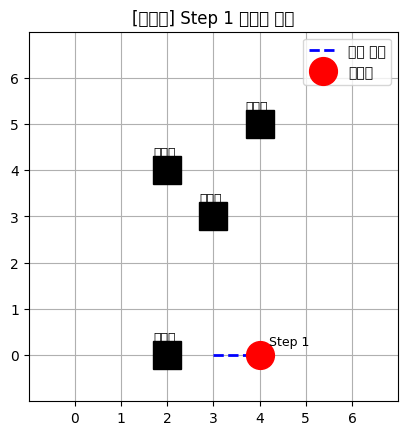

/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipyt


===== Step 2 =====
[5-4] 센서 데이터 업데이트 시작
[5-6] 현재 위치: x=4, y=0
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 현재 앞 센서 거리: 5cm
[Front Scan] 앞에 장애물이 매우 가까움! (5cm 이하)
[Front Scan] 스캔 완료, 현재 센서 상태: {'앞': 5, '왼쪽': 15.0, '오른쪽': 15.0}
[Left Scan] 현재 왼쪽 센서 거리: 2cm
[Left Scan] 왼쪽에 장애물이 매우 가까움! (5cm 이하)
[Left Scan] 스캔 완료, 현재 센서 상태: {'앞': 5, '왼쪽': 2, '오른쪽': 15.0}
[Right Scan] 현재 오른쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽에 약간의 장애물 감지 (15cm 이하)
[Right Scan] 스캔 완료, 현재 센서 상태: {'앞': 5, '왼쪽': 2, '오른쪽': 15.0}
[5-17] 센서 데이터 업데이트 완료: {'앞': 5, '왼쪽': 2, '오른쪽': 15.0}
[6-4] 함수 시작
[6-9] 현재 방향: 앞, 거리: 5
[6-12]⚠️ 위험! 앞 방향 → 목록에 추가됨 (거리 5 < 10.0)
[6-9] 현재 방향: 왼쪽, 거리: 2
[6-12]⚠️ 위험! 왼쪽 방향 → 목록에 추가됨 (거리 2 < 10.0)
[6-9] 현재 방향: 오른쪽, 거리: 15.0
[6-14] ✅ 안전 오른쪽 방향 (거리 15.0 ≥ 10.0)
[6-16] 장애물 감지 완료 → 최종 obstacles 리스트: ['앞', '왼쪽']
[7] 행동 결정 시작
[7] 행동 결정 완료 → 오른쪽 회전
[Turn] 오른쪽 회전 → 새로운 위치: (5, 0)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

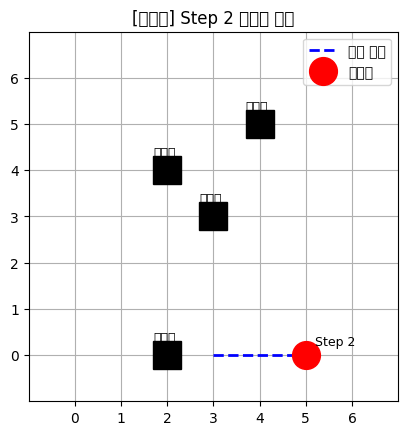


===== Step 3 =====
[5-4] 센서 데이터 업데이트 시작
[5-6] 현재 위치: x=5, y=0
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 현재 앞 센서 거리: 15.0cm
[Front Scan] 앞에 약간의 장애물 감지 (15cm 이하)
[Front Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Left Scan] 현재 왼쪽 센서 거리: 3cm
[Left Scan] 왼쪽에 장애물이 매우 가까움! (5cm 이하)
[Left Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 3, '오른쪽': 15.0}
[Right Scan] 현재 오른쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽에 약간의 장애물 감지 (15cm 이하)
[Right Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 3, '오른쪽': 15.0}
[5-17] 센서 데이터 업데이트 완료: {'앞': 15.0, '왼쪽': 3, '오른쪽': 15.0}
[6-4] 함수 시작
[6-9] 현재 방향: 앞, 거리: 15.0
[6-14] ✅ 안전 앞 방향 (거리 15.0 ≥ 10.0)
[6-9] 현재 방향: 왼쪽, 거리: 3
[6-12]⚠️ 위험! 왼쪽 방향 → 목록에 추가됨 (거리 3 < 10.0)
[6-9] 현재 방향: 오른쪽, 거리: 15.0
[6-14] ✅ 안전 오른쪽 방향 (거리 15.0 ≥ 10.0)
[6-16] 장애물 감지 완료 → 최종 obstacles 리스트: ['왼쪽']
[7] 행동 결정 시작
[7] 행동 결정 완료 → 전진
[Move] 전진 → 새로운 위치: (5, 1)


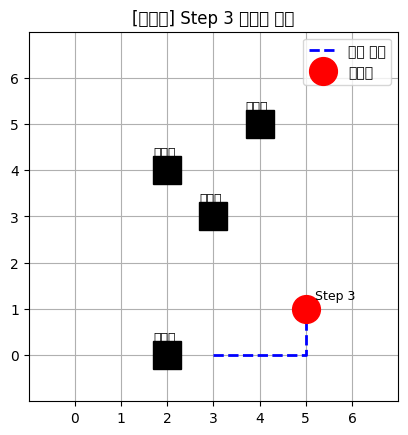

/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipyt


===== Step 4 =====
[5-4] 센서 데이터 업데이트 시작
[5-6] 현재 위치: x=5, y=1
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 현재 앞 센서 거리: 15.0cm
[Front Scan] 앞에 약간의 장애물 감지 (15cm 이하)
[Front Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Left Scan] 현재 왼쪽 센서 거리: 15.0cm
[Left Scan] 왼쪽에 약간의 장애물 감지 (15cm 이하)
[Left Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Right Scan] 현재 오른쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽에 약간의 장애물 감지 (15cm 이하)
[Right Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[5-17] 센서 데이터 업데이트 완료: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[6-4] 함수 시작
[6-9] 현재 방향: 앞, 거리: 15.0
[6-14] ✅ 안전 앞 방향 (거리 15.0 ≥ 10.0)
[6-9] 현재 방향: 왼쪽, 거리: 15.0
[6-14] ✅ 안전 왼쪽 방향 (거리 15.0 ≥ 10.0)
[6-9] 현재 방향: 오른쪽, 거리: 15.0
[6-14] ✅ 안전 오른쪽 방향 (거리 15.0 ≥ 10.0)
[6-16] 장애물 감지 완료 → 최종 obstacles 리스트: []
[7] 행동 결정 시작
[7] 행동 결정 완료 → 전진
[Move] 전진 → 새로운 위치: (5, 2)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

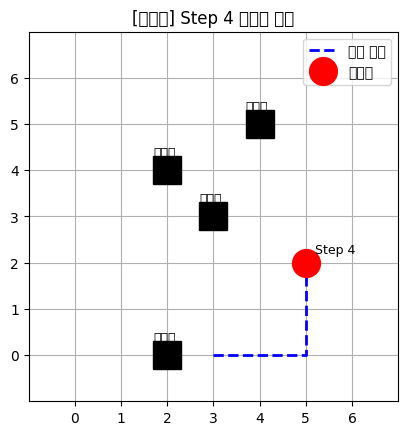

/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipyt


===== Step 5 =====
[5-4] 센서 데이터 업데이트 시작
[5-6] 현재 위치: x=5, y=2
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 현재 앞 센서 거리: 15.0cm
[Front Scan] 앞에 약간의 장애물 감지 (15cm 이하)
[Front Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Left Scan] 현재 왼쪽 센서 거리: 15.0cm
[Left Scan] 왼쪽에 약간의 장애물 감지 (15cm 이하)
[Left Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Right Scan] 현재 오른쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽에 약간의 장애물 감지 (15cm 이하)
[Right Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[5-17] 센서 데이터 업데이트 완료: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[6-4] 함수 시작
[6-9] 현재 방향: 앞, 거리: 15.0
[6-14] ✅ 안전 앞 방향 (거리 15.0 ≥ 10.0)
[6-9] 현재 방향: 왼쪽, 거리: 15.0
[6-14] ✅ 안전 왼쪽 방향 (거리 15.0 ≥ 10.0)
[6-9] 현재 방향: 오른쪽, 거리: 15.0
[6-14] ✅ 안전 오른쪽 방향 (거리 15.0 ≥ 10.0)
[6-16] 장애물 감지 완료 → 최종 obstacles 리스트: []
[7] 행동 결정 시작
[7] 행동 결정 완료 → 전진
[Move] 전진 → 새로운 위치: (5, 3)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

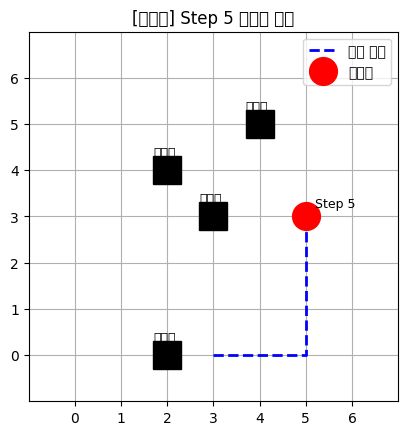

/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipyt


===== Step 6 =====
[5-4] 센서 데이터 업데이트 시작
[5-6] 현재 위치: x=5, y=3
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 현재 앞 센서 거리: 15.0cm
[Front Scan] 앞에 약간의 장애물 감지 (15cm 이하)
[Front Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Left Scan] 현재 왼쪽 센서 거리: 2cm
[Left Scan] 왼쪽에 장애물이 매우 가까움! (5cm 이하)
[Left Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 2, '오른쪽': 15.0}
[Right Scan] 현재 오른쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽에 약간의 장애물 감지 (15cm 이하)
[Right Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 2, '오른쪽': 15.0}
[5-17] 센서 데이터 업데이트 완료: {'앞': 15.0, '왼쪽': 2, '오른쪽': 15.0}
[6-4] 함수 시작
[6-9] 현재 방향: 앞, 거리: 15.0
[6-14] ✅ 안전 앞 방향 (거리 15.0 ≥ 10.0)
[6-9] 현재 방향: 왼쪽, 거리: 2
[6-12]⚠️ 위험! 왼쪽 방향 → 목록에 추가됨 (거리 2 < 10.0)
[6-9] 현재 방향: 오른쪽, 거리: 15.0
[6-14] ✅ 안전 오른쪽 방향 (거리 15.0 ≥ 10.0)
[6-16] 장애물 감지 완료 → 최종 obstacles 리스트: ['왼쪽']
[7] 행동 결정 시작
[7] 행동 결정 완료 → 전진
[Move] 전진 → 새로운 위치: (5, 4)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

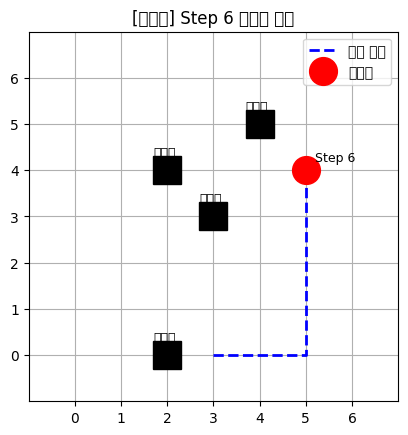

/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipy


===== Step 7 =====
[5-4] 센서 데이터 업데이트 시작
[5-6] 현재 위치: x=5, y=4
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 현재 앞 센서 거리: 15.0cm
[Front Scan] 앞에 약간의 장애물 감지 (15cm 이하)
[Front Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Left Scan] 현재 왼쪽 센서 거리: 3cm
[Left Scan] 왼쪽에 장애물이 매우 가까움! (5cm 이하)
[Left Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 3, '오른쪽': 15.0}
[Right Scan] 현재 오른쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽에 약간의 장애물 감지 (15cm 이하)
[Right Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 3, '오른쪽': 15.0}
[5-17] 센서 데이터 업데이트 완료: {'앞': 15.0, '왼쪽': 3, '오른쪽': 15.0}
[6-4] 함수 시작
[6-9] 현재 방향: 앞, 거리: 15.0
[6-14] ✅ 안전 앞 방향 (거리 15.0 ≥ 10.0)
[6-9] 현재 방향: 왼쪽, 거리: 3
[6-12]⚠️ 위험! 왼쪽 방향 → 목록에 추가됨 (거리 3 < 10.0)
[6-9] 현재 방향: 오른쪽, 거리: 15.0
[6-14] ✅ 안전 오른쪽 방향 (거리 15.0 ≥ 10.0)
[6-16] 장애물 감지 완료 → 최종 obstacles 리스트: ['왼쪽']
[7] 행동 결정 시작
[7] 행동 결정 완료 → 전진
[Move] 전진 → 새로운 위치: (5, 5)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

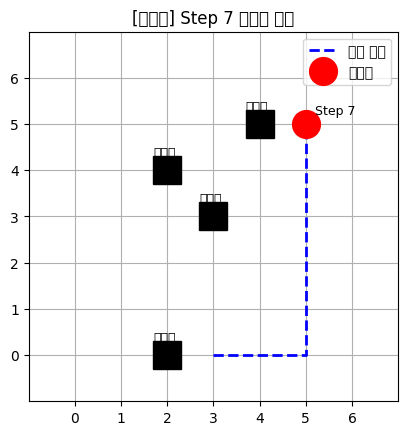

/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipyt


===== Step 8 =====
[5-4] 센서 데이터 업데이트 시작
[5-6] 현재 위치: x=5, y=5
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 현재 앞 센서 거리: 15.0cm
[Front Scan] 앞에 약간의 장애물 감지 (15cm 이하)
[Front Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Left Scan] 현재 왼쪽 센서 거리: 1cm
[Left Scan] 왼쪽에 장애물이 매우 가까움! (5cm 이하)
[Left Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 1, '오른쪽': 15.0}
[Right Scan] 현재 오른쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽에 약간의 장애물 감지 (15cm 이하)
[Right Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 1, '오른쪽': 15.0}
[5-17] 센서 데이터 업데이트 완료: {'앞': 15.0, '왼쪽': 1, '오른쪽': 15.0}
[6-4] 함수 시작
[6-9] 현재 방향: 앞, 거리: 15.0
[6-14] ✅ 안전 앞 방향 (거리 15.0 ≥ 10.0)
[6-9] 현재 방향: 왼쪽, 거리: 1
[6-12]⚠️ 위험! 왼쪽 방향 → 목록에 추가됨 (거리 1 < 10.0)
[6-9] 현재 방향: 오른쪽, 거리: 15.0
[6-14] ✅ 안전 오른쪽 방향 (거리 15.0 ≥ 10.0)
[6-16] 장애물 감지 완료 → 최종 obstacles 리스트: ['왼쪽']
[7] 행동 결정 시작
[7] 행동 결정 완료 → 전진
[Move] 전진 → 새로운 위치: (5, 6)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

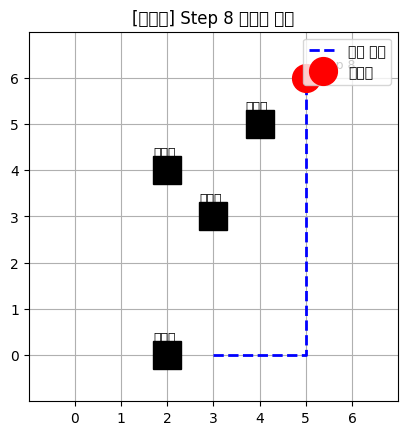

/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipyt


===== Step 9 =====
[5-4] 센서 데이터 업데이트 시작
[5-6] 현재 위치: x=5, y=6
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 현재 앞 센서 거리: 15.0cm
[Front Scan] 앞에 약간의 장애물 감지 (15cm 이하)
[Front Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Left Scan] 현재 왼쪽 센서 거리: 15.0cm
[Left Scan] 왼쪽에 약간의 장애물 감지 (15cm 이하)
[Left Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Right Scan] 현재 오른쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽에 약간의 장애물 감지 (15cm 이하)
[Right Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[5-17] 센서 데이터 업데이트 완료: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[6-4] 함수 시작
[6-9] 현재 방향: 앞, 거리: 15.0
[6-14] ✅ 안전 앞 방향 (거리 15.0 ≥ 10.0)
[6-9] 현재 방향: 왼쪽, 거리: 15.0
[6-14] ✅ 안전 왼쪽 방향 (거리 15.0 ≥ 10.0)
[6-9] 현재 방향: 오른쪽, 거리: 15.0
[6-14] ✅ 안전 오른쪽 방향 (거리 15.0 ≥ 10.0)
[6-16] 장애물 감지 완료 → 최종 obstacles 리스트: []
[7] 행동 결정 시작
[7] 행동 결정 완료 → 전진
[Move] 전진 → 새로운 위치: (5, 7)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


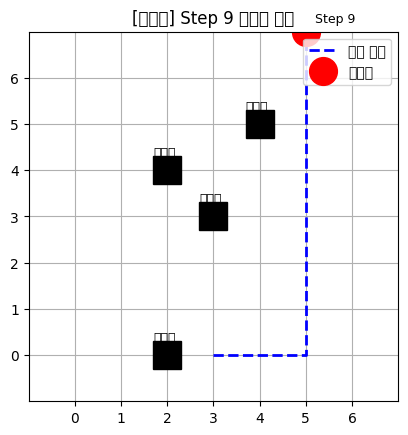

/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipython-input-2-3148239859.py:145: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.pause(0.7)
/tmp/ipyt


===== Step 10 =====
[5-4] 센서 데이터 업데이트 시작
[5-6] 현재 위치: x=5, y=7
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 현재 앞 센서 거리: 15.0cm
[Front Scan] 앞에 약간의 장애물 감지 (15cm 이하)
[Front Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Left Scan] 현재 왼쪽 센서 거리: 15.0cm
[Left Scan] 왼쪽에 약간의 장애물 감지 (15cm 이하)
[Left Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Right Scan] 현재 오른쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽에 약간의 장애물 감지 (15cm 이하)
[Right Scan] 스캔 완료, 현재 센서 상태: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[5-17] 센서 데이터 업데이트 완료: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[6-4] 함수 시작
[6-9] 현재 방향: 앞, 거리: 15.0
[6-14] ✅ 안전 앞 방향 (거리 15.0 ≥ 10.0)
[6-9] 현재 방향: 왼쪽, 거리: 15.0
[6-14] ✅ 안전 왼쪽 방향 (거리 15.0 ≥ 10.0)
[6-9] 현재 방향: 오른쪽, 거리: 15.0
[6-14] ✅ 안전 오른쪽 방향 (거리 15.0 ≥ 10.0)
[6-16] 장애물 감지 완료 → 최종 obstacles 리스트: []
[7] 행동 결정 시작
[7] 행동 결정 완료 → 전진
[Move] 전진 → 새로운 위치: (5, 8)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

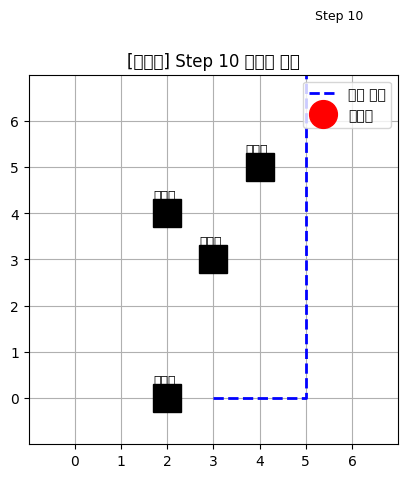

[Simulation] 최종 위치: (5, 8)
[9] 프로그램 종료


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# ✅ 한글 폰트 깨짐 방지 설정
mpl.rc('font', family='Nanum Gothic')  # macOS일 경우 'AppleGothic'로 바꿔주세요
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 1번: 센서 초기화
def init_sensors():
    sensors = {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
    print("[1] 센서 초기화:", sensors)
    return sensors

# 2~4번: 센서 스캔
def scan_front(x, y, obstacles, sensors):
    front_distance = 15.0
    for ox, oy in obstacles:
        if ox == x and oy > y:
            distance = oy - y
            if distance < front_distance:
                front_distance = distance
    sensors['앞'] = front_distance
    print(f"[Front Scan] 현재 앞 센서 거리: {sensors['앞']}cm")
    if front_distance <= 5.0:
        print("[Front Scan] 앞에 장애물이 매우 가까움! (5cm 이하)")
    elif front_distance <= 10.0:
        print("[Front Scan] 앞에 장애물이 가까움 (10cm 이하)")
    elif front_distance <= 15.0:
        print("[Front Scan] 앞에 약간의 장애물 감지 (15cm 이하)")
    else:
        print("[Front Scan] 앞에 장애물 없음, 직진 가능")
    print("[Front Scan] 스캔 완료, 현재 센서 상태:", sensors)
    return sensors

def scan_left(x, y, obstacles, sensors):
    left_distance = 15.0
    for ox, oy in obstacles:
        if oy == y and ox < x:
            distance = x - ox
            if distance < left_distance:
                left_distance = distance
    sensors['왼쪽'] = left_distance
    print(f"[Left Scan] 현재 왼쪽 센서 거리: {sensors['왼쪽']}cm")
    if left_distance <= 5.0:
        print("[Left Scan] 왼쪽에 장애물이 매우 가까움! (5cm 이하)")
    elif left_distance <= 10.0:
        print("[Left Scan] 왼쪽에 장애물이 가까움 (10cm 이하)")
    elif left_distance <= 15.0:
        print("[Left Scan] 왼쪽에 약간의 장애물 감지 (15cm 이하)")
    else:
        print("[Left Scan] 왼쪽에 장애물 없음, 좌회전 가능")
    print("[Left Scan] 스캔 완료, 현재 센서 상태:", sensors)
    return sensors

def scan_right(x, y, obstacles, sensors):
    right_distance = 15.0
    for ox, oy in obstacles:
        if oy == y and ox > x:
            distance = ox - x
            if distance < right_distance:
                right_distance = distance
    sensors['오른쪽'] = right_distance
    print(f"[Right Scan] 현재 오른쪽 센서 거리: {sensors['오른쪽']}cm")
    if right_distance <= 5.0:
        print("[Right Scan] 오른쪽에 장애물이 매우 가까움! (5cm 이하)")
    elif right_distance <= 10.0:
        print("[Right Scan] 오른쪽에 장애물이 가까움 (10cm 이하)")
    elif right_distance <= 15.0:
        print("[Right Scan] 오른쪽에 약간의 장애물 감지 (15cm 이하)")
    else:
        print("[Right Scan] 오른쪽에 장애물 없음, 우회전 가능")
    print("[Right Scan] 스캔 완료, 현재 센서 상태:", sensors)
    return sensors

# 5번: 센서 데이터 업데이트
def update_sensor_data(position, obstacles):
    print("[5-4] 센서 데이터 업데이트 시작")
    x, y = position
    print(f"[5-6] 현재 위치: x={x}, y={y}")
    sensors = init_sensors()
    sensors = scan_front(x, y, obstacles, sensors)
    sensors = scan_left(x, y, obstacles, sensors)
    sensors = scan_right(x, y, obstacles, sensors)
    print("[5-17] 센서 데이터 업데이트 완료:", sensors)
    return sensors

# 6번: 장애물 감지
def detect_obstacles(sensors):
    print("[6-4] 함수 시작")
    obstacles = []
    for direction, distance in sensors.items():
        print(f"[6-9] 현재 방향: {direction}, 거리: {distance}")
        if distance < 10.0:
            obstacles.append(direction)
            print(f"[6-12]⚠️ 위험! {direction} 방향 → 목록에 추가됨 (거리 {distance} < 10.0)")
        else:
            print(f"[6-14] ✅ 안전 {direction} 방향 (거리 {distance} ≥ 10.0)")
    print("[6-16] 장애물 감지 완료 → 최종 obstacles 리스트:", obstacles)
    return obstacles

# 7번: 행동 결정
def decide_action(obstacles):
    print("[7] 행동 결정 시작")
    if '앞' not in obstacles and '왼쪽' not in obstacles and '오른쪽' not in obstacles:
        action = "전진"
    elif '앞' in obstacles and '왼쪽' not in obstacles:
        action = "왼쪽 회전"
    elif '앞' in obstacles and '오른쪽' not in obstacles:
        action = "오른쪽 회전"
    elif '앞' in obstacles and '왼쪽' in obstacles and '오른쪽' in obstacles:
        action = "정지"
    else:
        action = "전진"
    print("[7] 행동 결정 완료 →", action)
    return action

# 시각화 함수
def visualize_map(car_position, path_history, obstacles, step):
    grid_size = 7
    plt.clf()
    plt.title(f"[시각화] Step {step} 자동차 위치")
    plt.xlim(-1, grid_size)
    plt.ylim(-1, grid_size)
    plt.xticks(range(grid_size))
    plt.yticks(range(grid_size))
    plt.grid(True)

    # 장애물
    for ox, oy in obstacles:
        plt.plot(ox, oy, 'ks', markersize=20)
        plt.text(ox - 0.3, oy + 0.3, "장애물", fontsize=9)

    # 경로
    if len(path_history) > 1:
        xs, ys = zip(*path_history)
        plt.plot(xs, ys, 'b--', linewidth=2, label='이동 경로')

    # 현재 위치 + 라벨
    x, y = car_position
    plt.plot(x, y, 'ro', markersize=20, label='자동차')
    plt.text(x + 0.2, y + 0.2, f"Step {step}", fontsize=9)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend(loc='upper right')
    plt.pause(0.7)

# 8번: 자동차 클래스
class SimpleCar:
    def __init__(self, name, x, y):
        self.name = name
        self.position = (x, y)
        self.path = [self.position]
        print(f"[Car Init] 자동차 {self.name} 생성, 초기 위치: {self.position}")

    def move_forward(self):
        x, y = self.position
        self.position = (x, y + 1)
        print(f"[Move] 전진 → 새로운 위치: {self.position}")

    def turn_left(self):
        x, y = self.position
        self.position = (x - 1, y)
        print(f"[Turn] 왼쪽 회전 → 새로운 위치: {self.position}")

    def turn_right(self):
        x, y = self.position
        self.position = (x + 1, y)
        print(f"[Turn] 오른쪽 회전 → 새로운 위치: {self.position}")

    def stop(self):
        print(f"[Stop] 정지 → 현재 위치 유지: {self.position}")

    def execute_action(self, action):
        if action == "전진":
            self.move_forward()
        elif action == "왼쪽 회전":
            self.turn_left()
        elif action == "오른쪽 회전":
            self.turn_right()
        elif action == "정지":
            self.stop()
        self.path.append(self.position)

    def run_simulation(self, obstacles):
        plt.ion()
        for step in range(10):
            print(f"\n===== Step {step + 1} =====")
            sensors = update_sensor_data(self.position, obstacles)
            detections = detect_obstacles(sensors)
            action = decide_action(detections)
            self.execute_action(action)
            visualize_map(self.position, self.path, obstacles, step + 1)
            if action == "정지":
                print("[Simulation] 장애물로 인해 정지합니다.")
                break
        plt.ioff()
        plt.show()
        print(f"[Simulation] 최종 위치: {self.position}")

# 9번: 메인 실행
if __name__ == "__main__":
    print("[9] 메인 실행 시작")
    car = SimpleCar("현대차", 3, 0)
    obstacles = {(4, 5), (3, 3), (2, 0), (2, 4)}
    print("[9] 장애물 설정 완료:", obstacles)
    car.run_simulation(obstacles)
    print("[9] 프로그램 종료")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

[9] 시뮬레이션 시작
[Car Init] 자동차 현대차 시작 위치: (3, 0)
[9] 장애물 설정 완료: {(6, 6), (5, 10), (12, 12), (10, 5)}

===== Step 1 =====
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 앞 센서 거리: 15.0cm
[Left Scan] 왼쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽 센서 거리: 15.0cm
결정된 행동: 전진


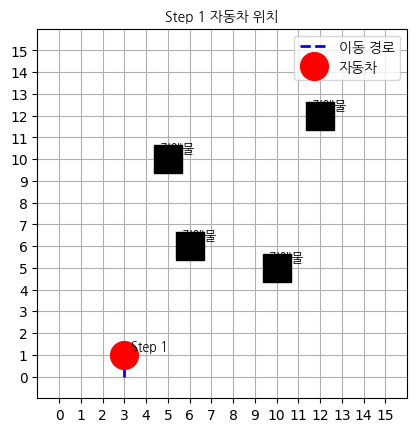


===== Step 2 =====
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 앞 센서 거리: 15.0cm
[Left Scan] 왼쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽 센서 거리: 15.0cm
결정된 행동: 전진


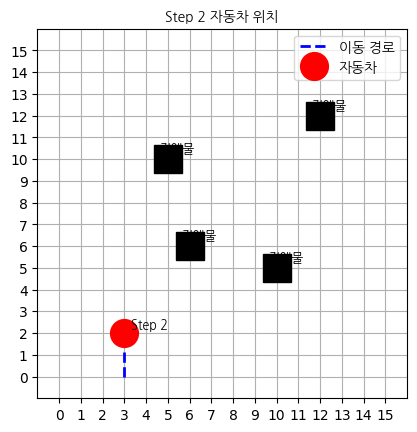


===== Step 3 =====
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 앞 센서 거리: 15.0cm
[Left Scan] 왼쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽 센서 거리: 15.0cm
결정된 행동: 전진


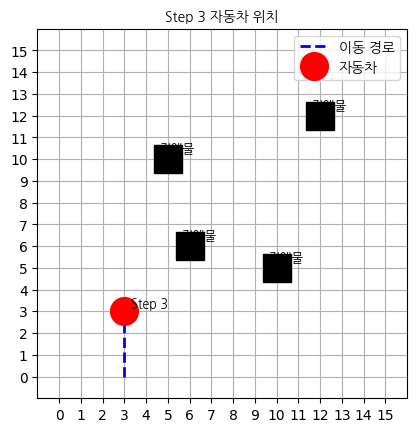


===== Step 4 =====
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 앞 센서 거리: 15.0cm
[Left Scan] 왼쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽 센서 거리: 15.0cm
결정된 행동: 전진


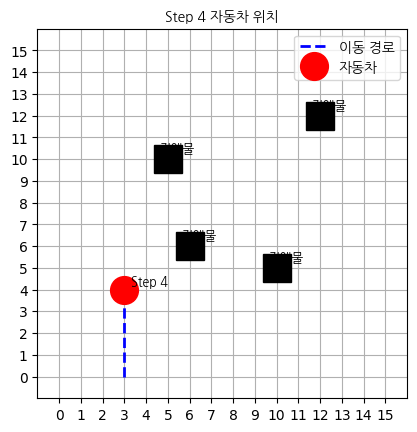


===== Step 5 =====
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 앞 센서 거리: 15.0cm
[Left Scan] 왼쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽 센서 거리: 15.0cm
결정된 행동: 전진


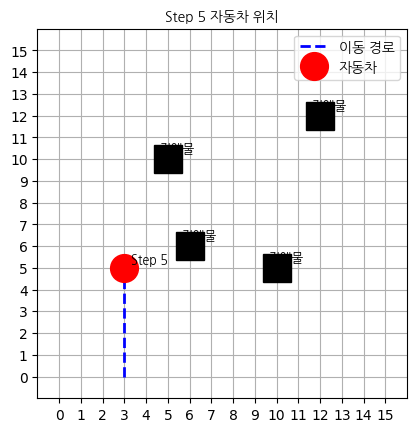


===== Step 6 =====
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 앞 센서 거리: 15.0cm
[Left Scan] 왼쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽 센서 거리: 7cm
결정된 행동: 전진


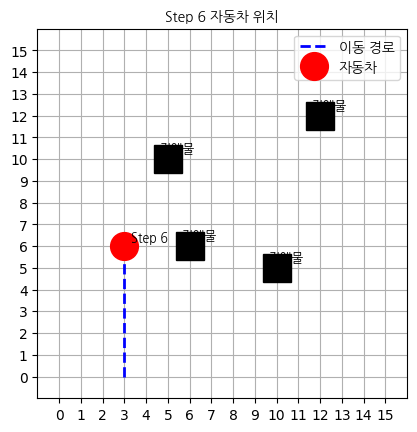


===== Step 7 =====
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 앞 센서 거리: 15.0cm
[Left Scan] 왼쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽 센서 거리: 3cm
결정된 행동: 전진


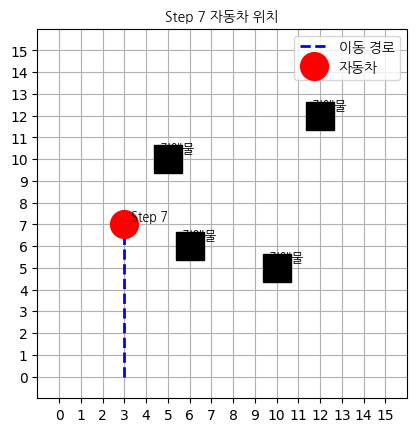


===== Step 8 =====
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 앞 센서 거리: 15.0cm
[Left Scan] 왼쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽 센서 거리: 15.0cm
결정된 행동: 전진


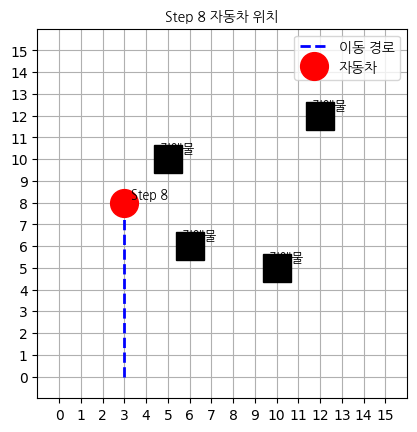


===== Step 9 =====
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 앞 센서 거리: 15.0cm
[Left Scan] 왼쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽 센서 거리: 15.0cm
결정된 행동: 전진


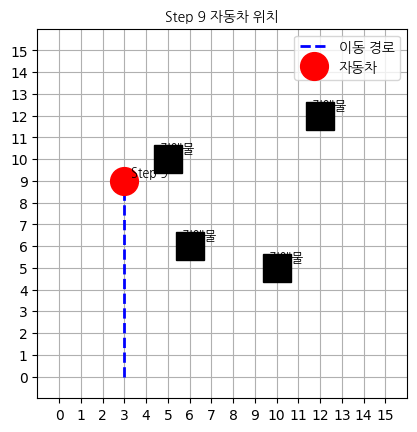


===== Step 10 =====
[1] 센서 초기화: {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
[Front Scan] 앞 센서 거리: 15.0cm
[Left Scan] 왼쪽 센서 거리: 15.0cm
[Right Scan] 오른쪽 센서 거리: 15.0cm
결정된 행동: 전진


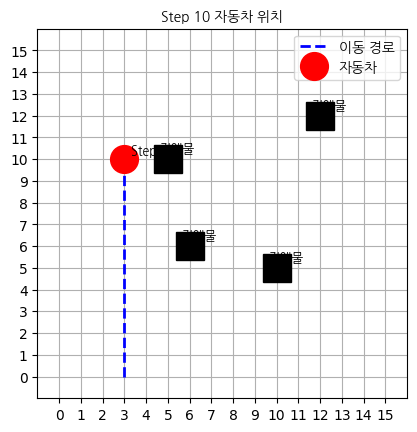

[Simulation] 최종 위치: (3, 10)
[9] 프로그램 종료


In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import os

# Install a Korean font in Colab
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Find the font path after installation
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
mpl.rc('font', family=font_prop.get_name())
mpl.rcParams['axes.unicode_minus'] = False

# ✅ 좌표 제한 상수
MAX_COORD = 15  # 0~15 사이로 제한

# ========== 센서 초기화 및 스캔 ==========
def init_sensors():
    sensors = {'앞': 15.0, '왼쪽': 15.0, '오른쪽': 15.0}
    print("[1] 센서 초기화:", sensors)
    return sensors

def scan_front(x, y, obstacles, sensors):
    front_distance = 15.0
    for ox, oy in obstacles:
        if ox == x and oy > y:
            distance = oy - y
            if distance < front_distance:
                front_distance = distance
    sensors['앞'] = front_distance
    print(f"[Front Scan] 앞 센서 거리: {sensors['앞']}cm")
    return sensors

def scan_left(x, y, obstacles, sensors):
    left_distance = 15.0
    for ox, oy in obstacles:
        if oy == y and ox < x:
            distance = x - ox
            if distance < left_distance:
                left_distance = distance
    sensors['왼쪽'] = left_distance
    print(f"[Left Scan] 왼쪽 센서 거리: {sensors['왼쪽']}cm")
    return sensors

def scan_right(x, y, obstacles, sensors):
    right_distance = 15.0
    for ox, oy in obstacles:
        if oy == y and ox > x:
            distance = ox - x
            if distance < right_distance:
                right_distance = distance
    sensors['오른쪽'] = right_distance
    print(f"[Right Scan] 오른쪽 센서 거리: {sensors['오른쪽']}cm")
    return sensors

# ========== 센서 데이터 업데이트 및 감지 ==========
def update_sensor_data(position, obstacles):
    x, y = position
    sensors = init_sensors()
    sensors = scan_front(x, y, obstacles, sensors)
    sensors = scan_left(x, y, obstacles, sensors)
    sensors = scan_right(x, y, obstacles, sensors)
    return sensors

def detect_obstacles(sensors):
    obstacles = []
    for direction, distance in sensors.items():
        if distance < 10.0:
            obstacles.append(direction)
    return obstacles

# ========== 행동 결정 ==========
def decide_action(obstacles):
    if '앞' not in obstacles and '왼쪽' not in obstacles and '오른쪽' not in obstacles:
        return "전진"
    elif '앞' in obstacles and '왼쪽' not in obstacles:
        return "왼쪽 회전"
    elif '앞' in obstacles and '오른쪽' not in obstacles:
        return "오른쪽 회전"
    elif all(d in obstacles for d in ['앞', '왼쪽', '오른쪽']):
        return "정지"
    else:
        return "전진"

# ========== 시각화 ==========
def visualize_map(car_position, path_history, obstacles, step):
    plt.clf()
    plt.title(f"Step {step} 자동차 위치", fontproperties=font_prop)
    plt.xlim(-1, MAX_COORD + 1)
    plt.ylim(-1, MAX_COORD + 1)
    plt.xticks(range(0, MAX_COORD + 1))
    plt.yticks(range(0, MAX_COORD + 1))
    plt.grid(True)

    # 장애물 표시
    for ox, oy in obstacles:
        plt.plot(ox, oy, 'ks', markersize=20)
        plt.text(ox - 0.4, oy + 0.3, "장애물", fontsize=9, fontproperties=font_prop)

    # 이동 경로
    if len(path_history) > 1:
        xs, ys = zip(*path_history)
        plt.plot(xs, ys, 'b--', linewidth=2, label='이동 경로')

    # 자동차 위치 표시
    x, y = car_position
    plt.plot(x, y, 'ro', markersize=20, label='자동차')
    plt.text(x + 0.3, y + 0.2, f"Step {step}", fontsize=9, fontproperties=font_prop)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend(loc='upper right', prop=font_prop)
    plt.pause(0.7)

# ========== 자동차 클래스 ==========
class SimpleCar:
    def __init__(self, name, x, y):
        self.name = name
        self.position = (x, y)
        self.path = [self.position]
        print(f"[Car Init] 자동차 {self.name} 시작 위치: {self.position}")

    def move_forward(self):
        x, y = self.position
        if y + 1 <= MAX_COORD:
            self.position = (x, y + 1)
        else:
            print(f"[경고] y+1 = {y+1} → 최대 좌표 {MAX_COORD} 초과! 이동 취소")

    def turn_left(self):
        x, y = self.position
        if x - 1 >= 0:
            self.position = (x - 1, y)
        else:
            print(f"[경고] x-1 = {x-1} → 최소 좌표 0 미만! 이동 취소")

    def turn_right(self):
        x, y = self.position
        if x + 1 <= MAX_COORD:
            self.position = (x + 1, y)
        else:
            print(f"[경고] x+1 = {x+1} → 최대 좌표 {MAX_COORD} 초과! 이동 취소")

    def stop(self):
        print(f"[Stop] 정지 상태 유지 → {self.position}")

    def execute_action(self, action):
        if action == "전진":
            self.move_forward()
        elif action == "왼쪽 회전":
            self.turn_left()
        elif action == "오른쪽 회전":
            self.turn_right()
        elif action == "정지":
            self.stop()
        self.path.append(self.position)

    def run_simulation(self, obstacles):
        plt.ion()
        for step in range(10):
            print(f"\n===== Step {step + 1} =====")
            sensors = update_sensor_data(self.position, obstacles)
            detections = detect_obstacles(sensors)
            action = decide_action(detections)
            print(f"결정된 행동: {action}")
            self.execute_action(action)
            visualize_map(self.position, self.path, obstacles, step + 1)
            if action == "정지":
                print("[Simulation] 정지 명령으로 시뮬레이션 종료.")
                break
        plt.ioff()
        plt.show()
        print(f"[Simulation] 최종 위치: {self.position}")

# ========== 메인 실행 ==========
if __name__ == "__main__":
    print("[9] 시뮬레이션 시작")

    # 자동차 시작 위치
    car = SimpleCar("현대차", 3, 0)

    # ✅ 변경된 장애물 좌표 (더 멀리 배치하여 초반 회피 방지)
    obstacles = {
        (6, 6),   # 오른쪽 위
        (5, 10),  # 멀리 전방
        (10, 5),  # 먼 오른쪽
        (12, 12)  # 오른쪽 위 끝
    }

    print("[9] 장애물 설정 완료:", obstacles)
    car.run_simulation(obstacles)
    print("[9] 프로그램 종료")